# Import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset path

In [ ]:
dataset_path = '/content/Healthcare-Diabetes.csv'
dataset = pd.read_csv(dataset_path)

In [ ]:
# remove id column
dataset = dataset.iloc[:,1:]

#Drop null
dataset.dropna

dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


Columns Information:

*   Id: Unique identifier for each data entry.
*   Pregnancies: Number of times pregnant.
*   Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
*   BloodPressure: Diastolic blood pressure (mm Hg).

*   SkinThickness: Triceps skinfold thickness (mm).
*   Insulin: 2-Hour serum insulin (mu U/ml).

*   BMI: Body mass index (weight in kg / height in m^2).
*   DiabetesPedigreeFunction: Diabetes pedigree function, a genetic score of diabetes.
*   Age: Age in years.
*   Outcome: Result (0: No, 1: Yes).



















# Preprocessing

In [ ]:
import plotly.express as px
px.pie(dataset,'Outcome',color='Outcome',color_discrete_sequence=['#007500','#5CFF5C'], title='Label Distribution')

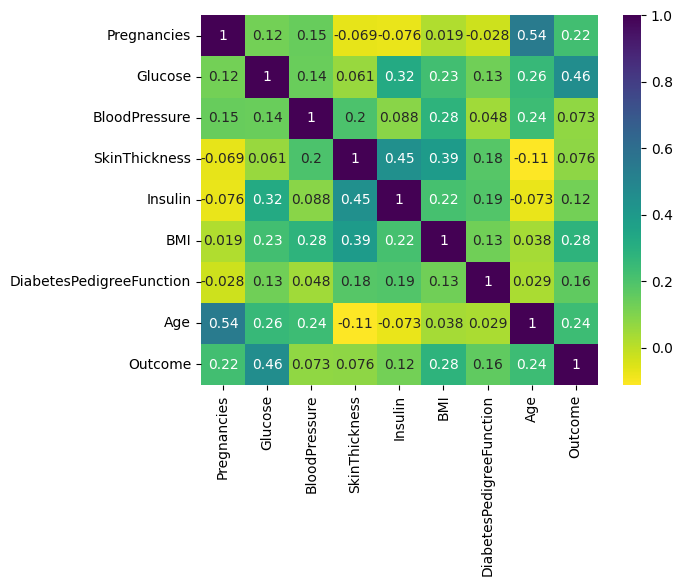

In [ ]:
corr = dataset.corr()
sns.heatmap(corr, cmap = 'viridis_r', annot=True)
plt.show()

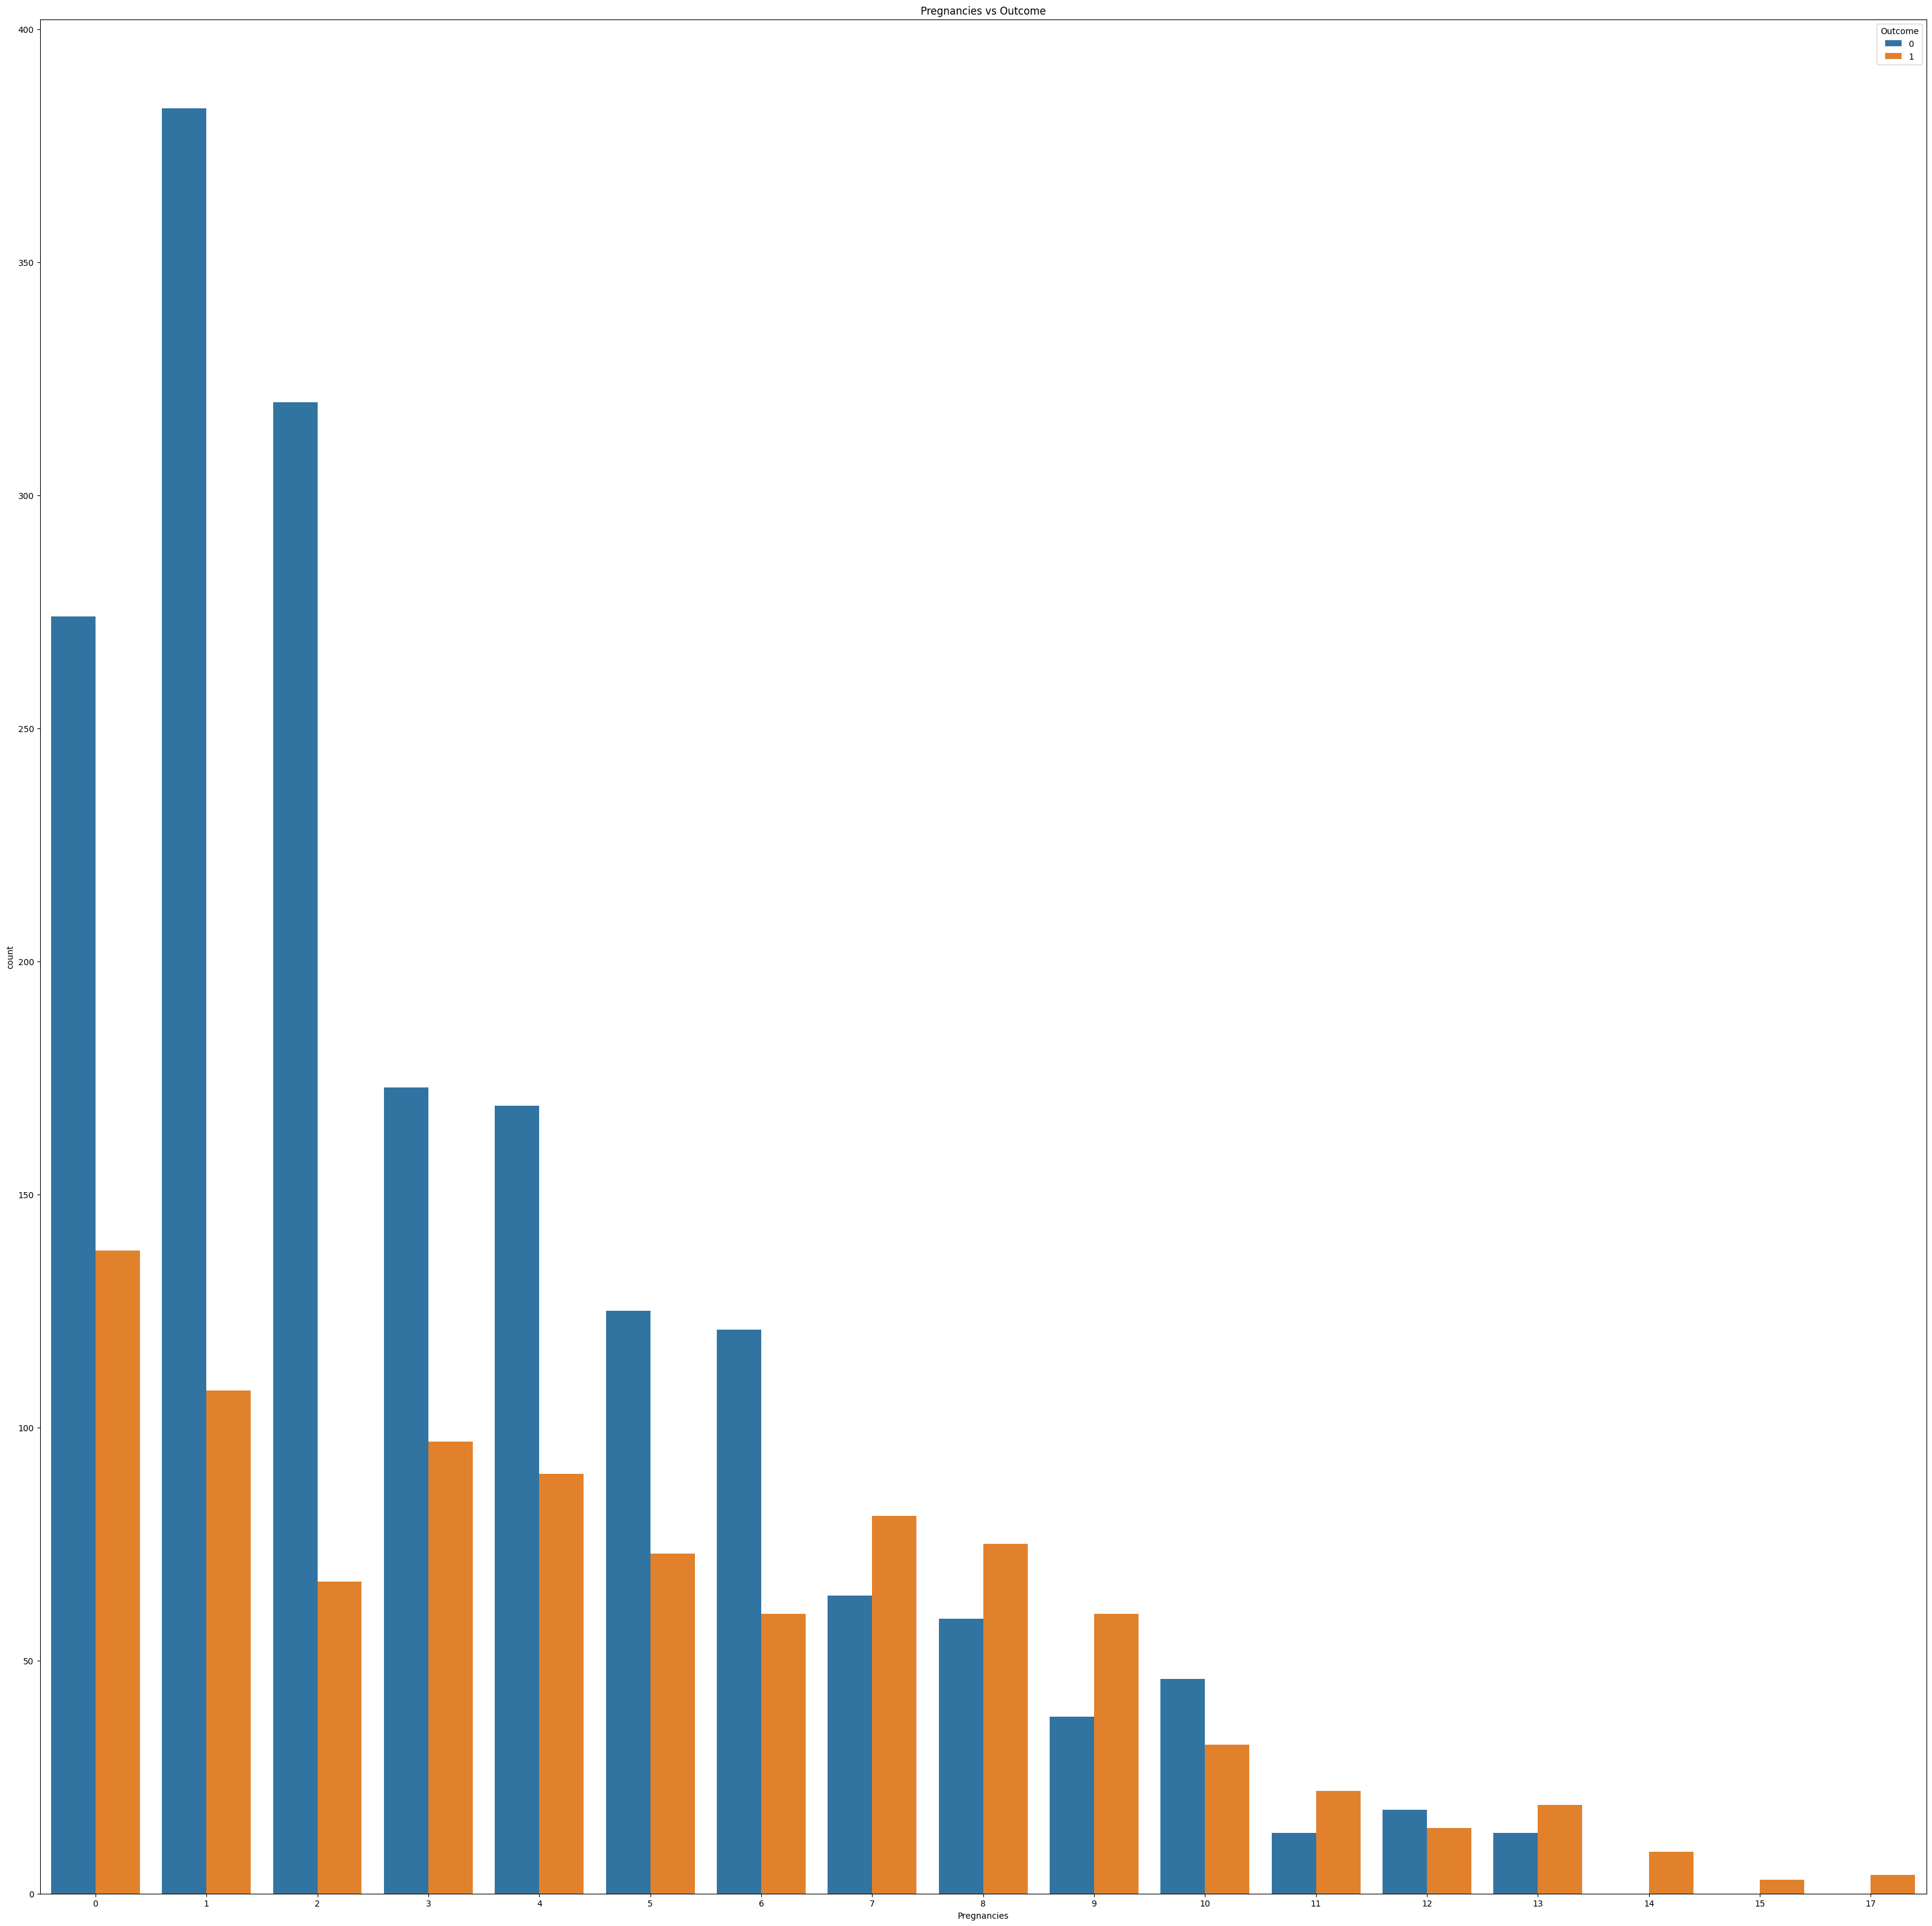

In [ ]:
fig, ax = plt.subplots(figsize=(40, 40))
sns.countplot(x="Pregnancies", hue="Outcome", data=dataset, ax=ax)
ax.set_title("Pregnancies vs Outcome")
xticks = ax.get_xticks()
plt.show()

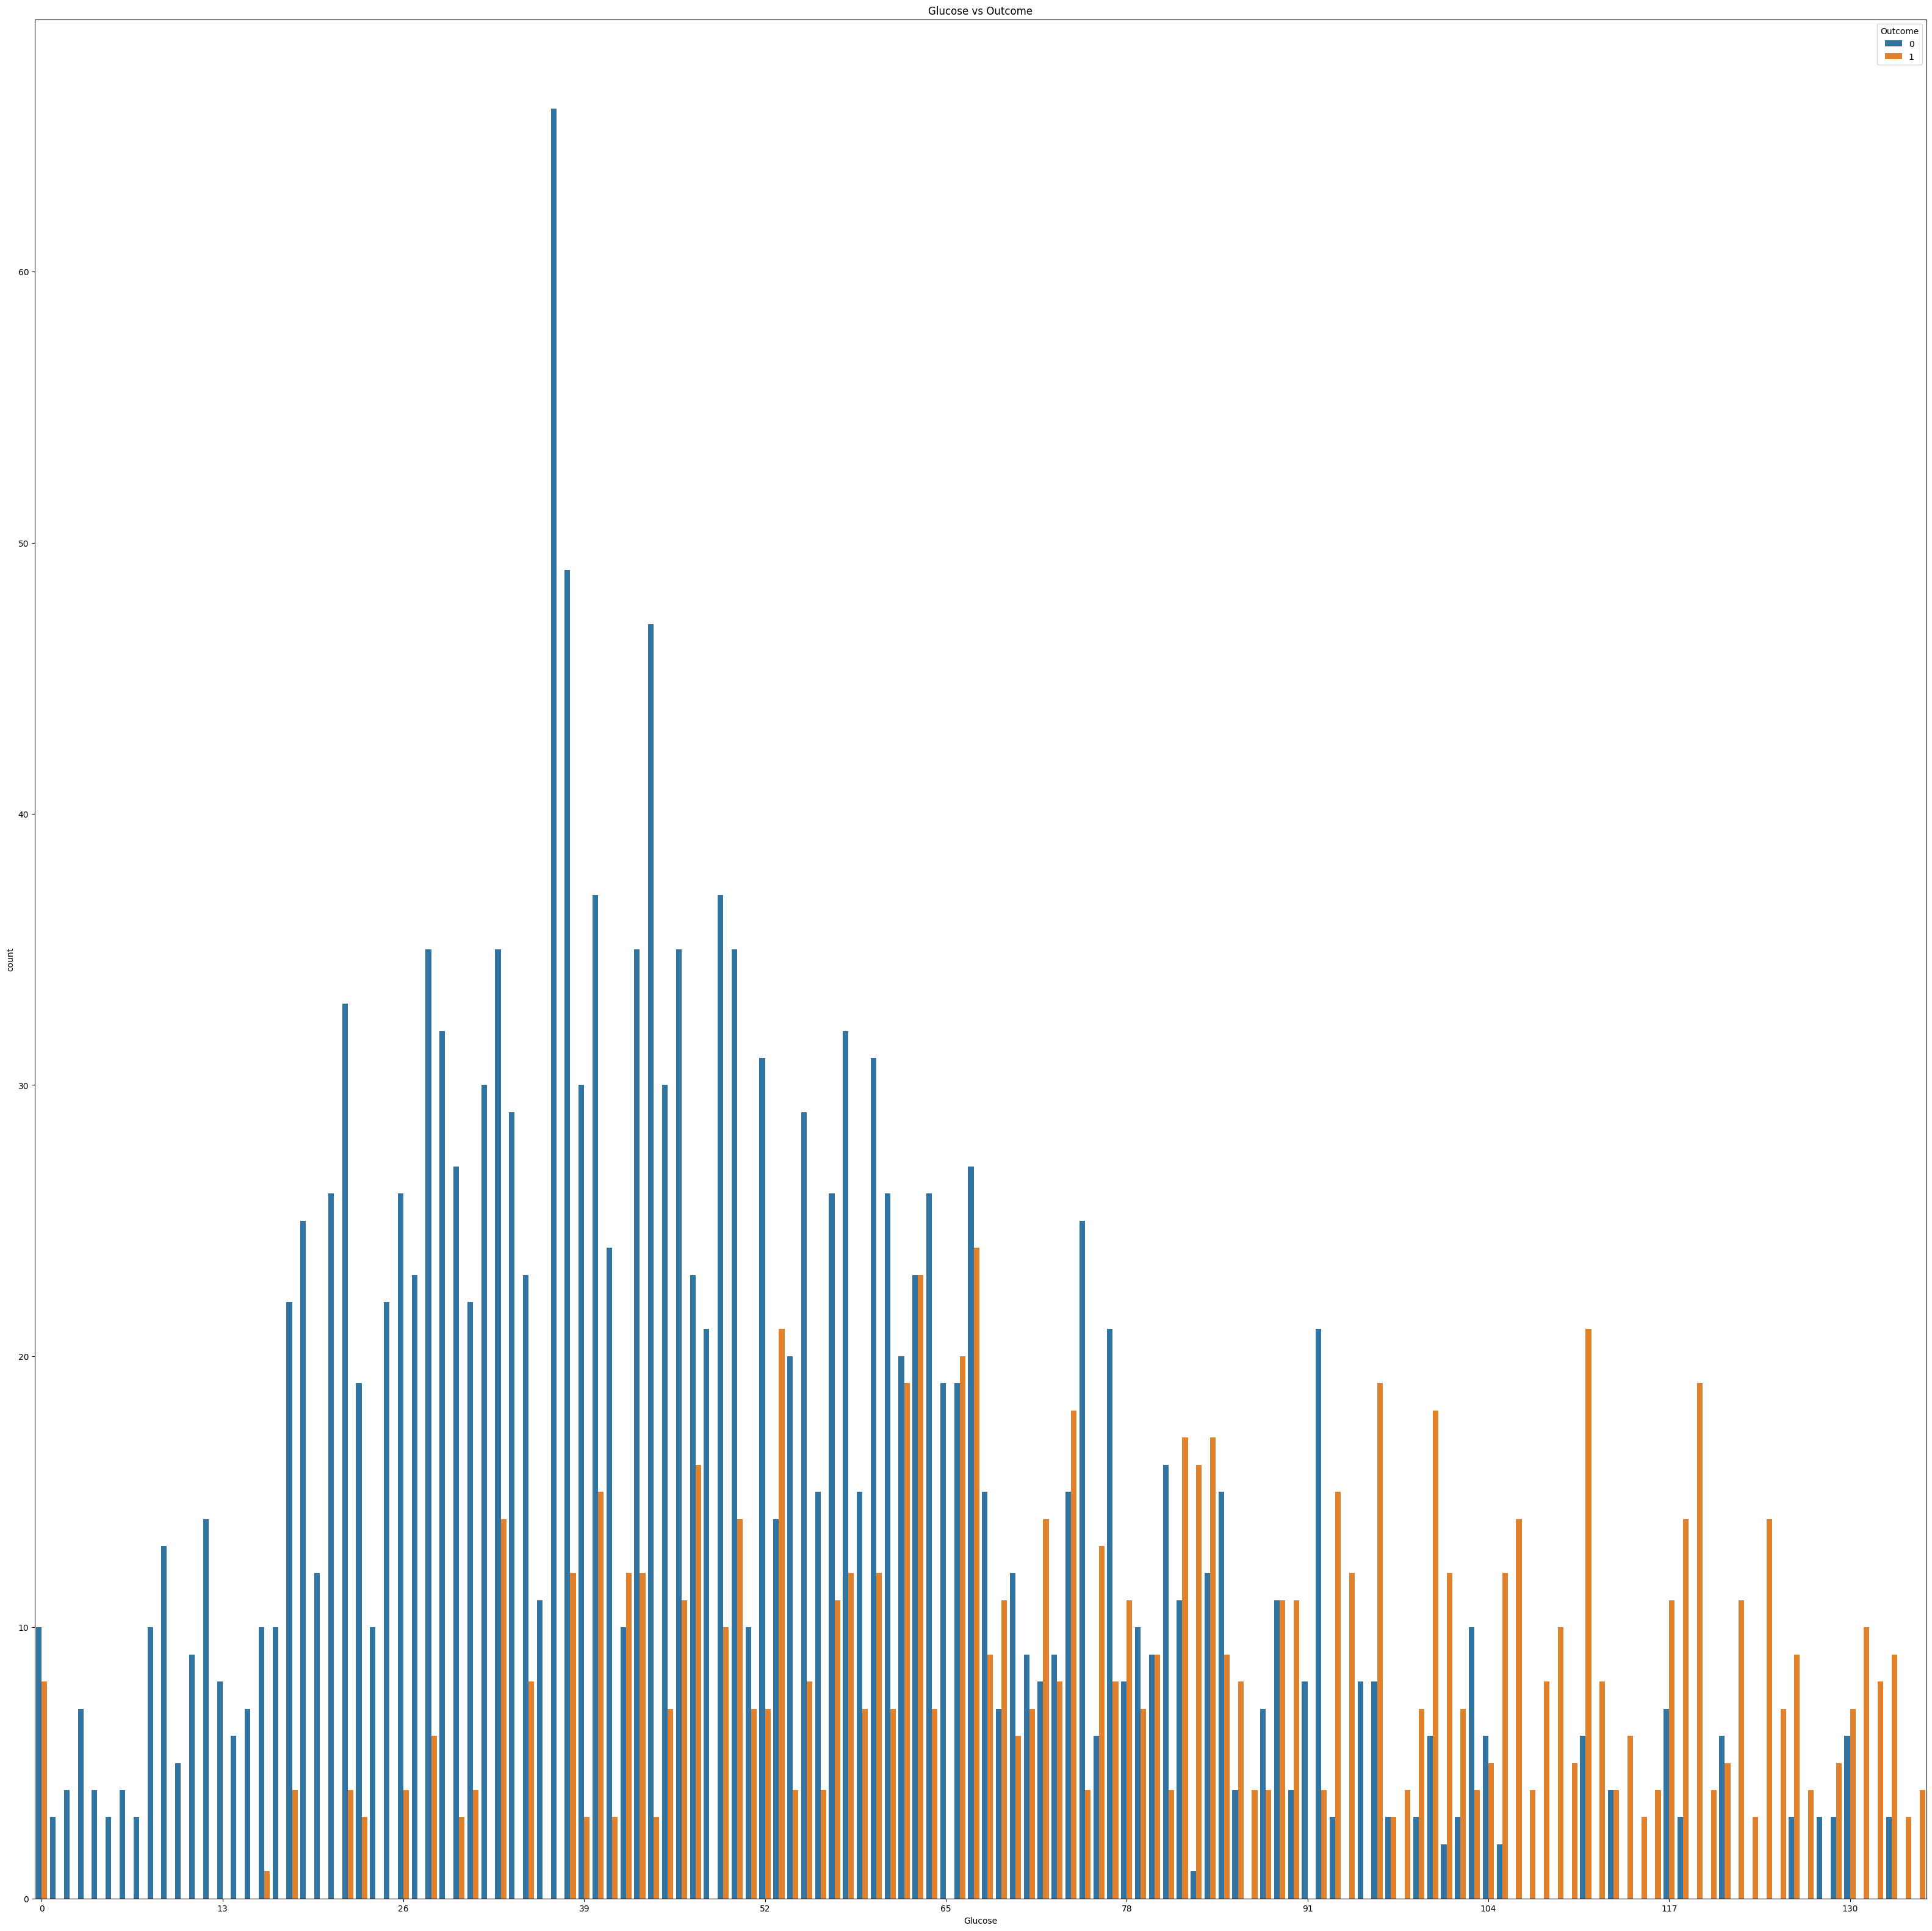

In [ ]:
fig, ax = plt.subplots(figsize=(40, 40))
sns.countplot(x="Glucose", hue="Outcome", data=dataset, ax=ax)
ax.set_title("Glucose vs Outcome")
num_ticks = 10
xticks = ax.get_xticks()
plt.xticks(xticks[::len(xticks)//num_ticks], xticks[::len(xticks)//num_ticks])
plt.show()

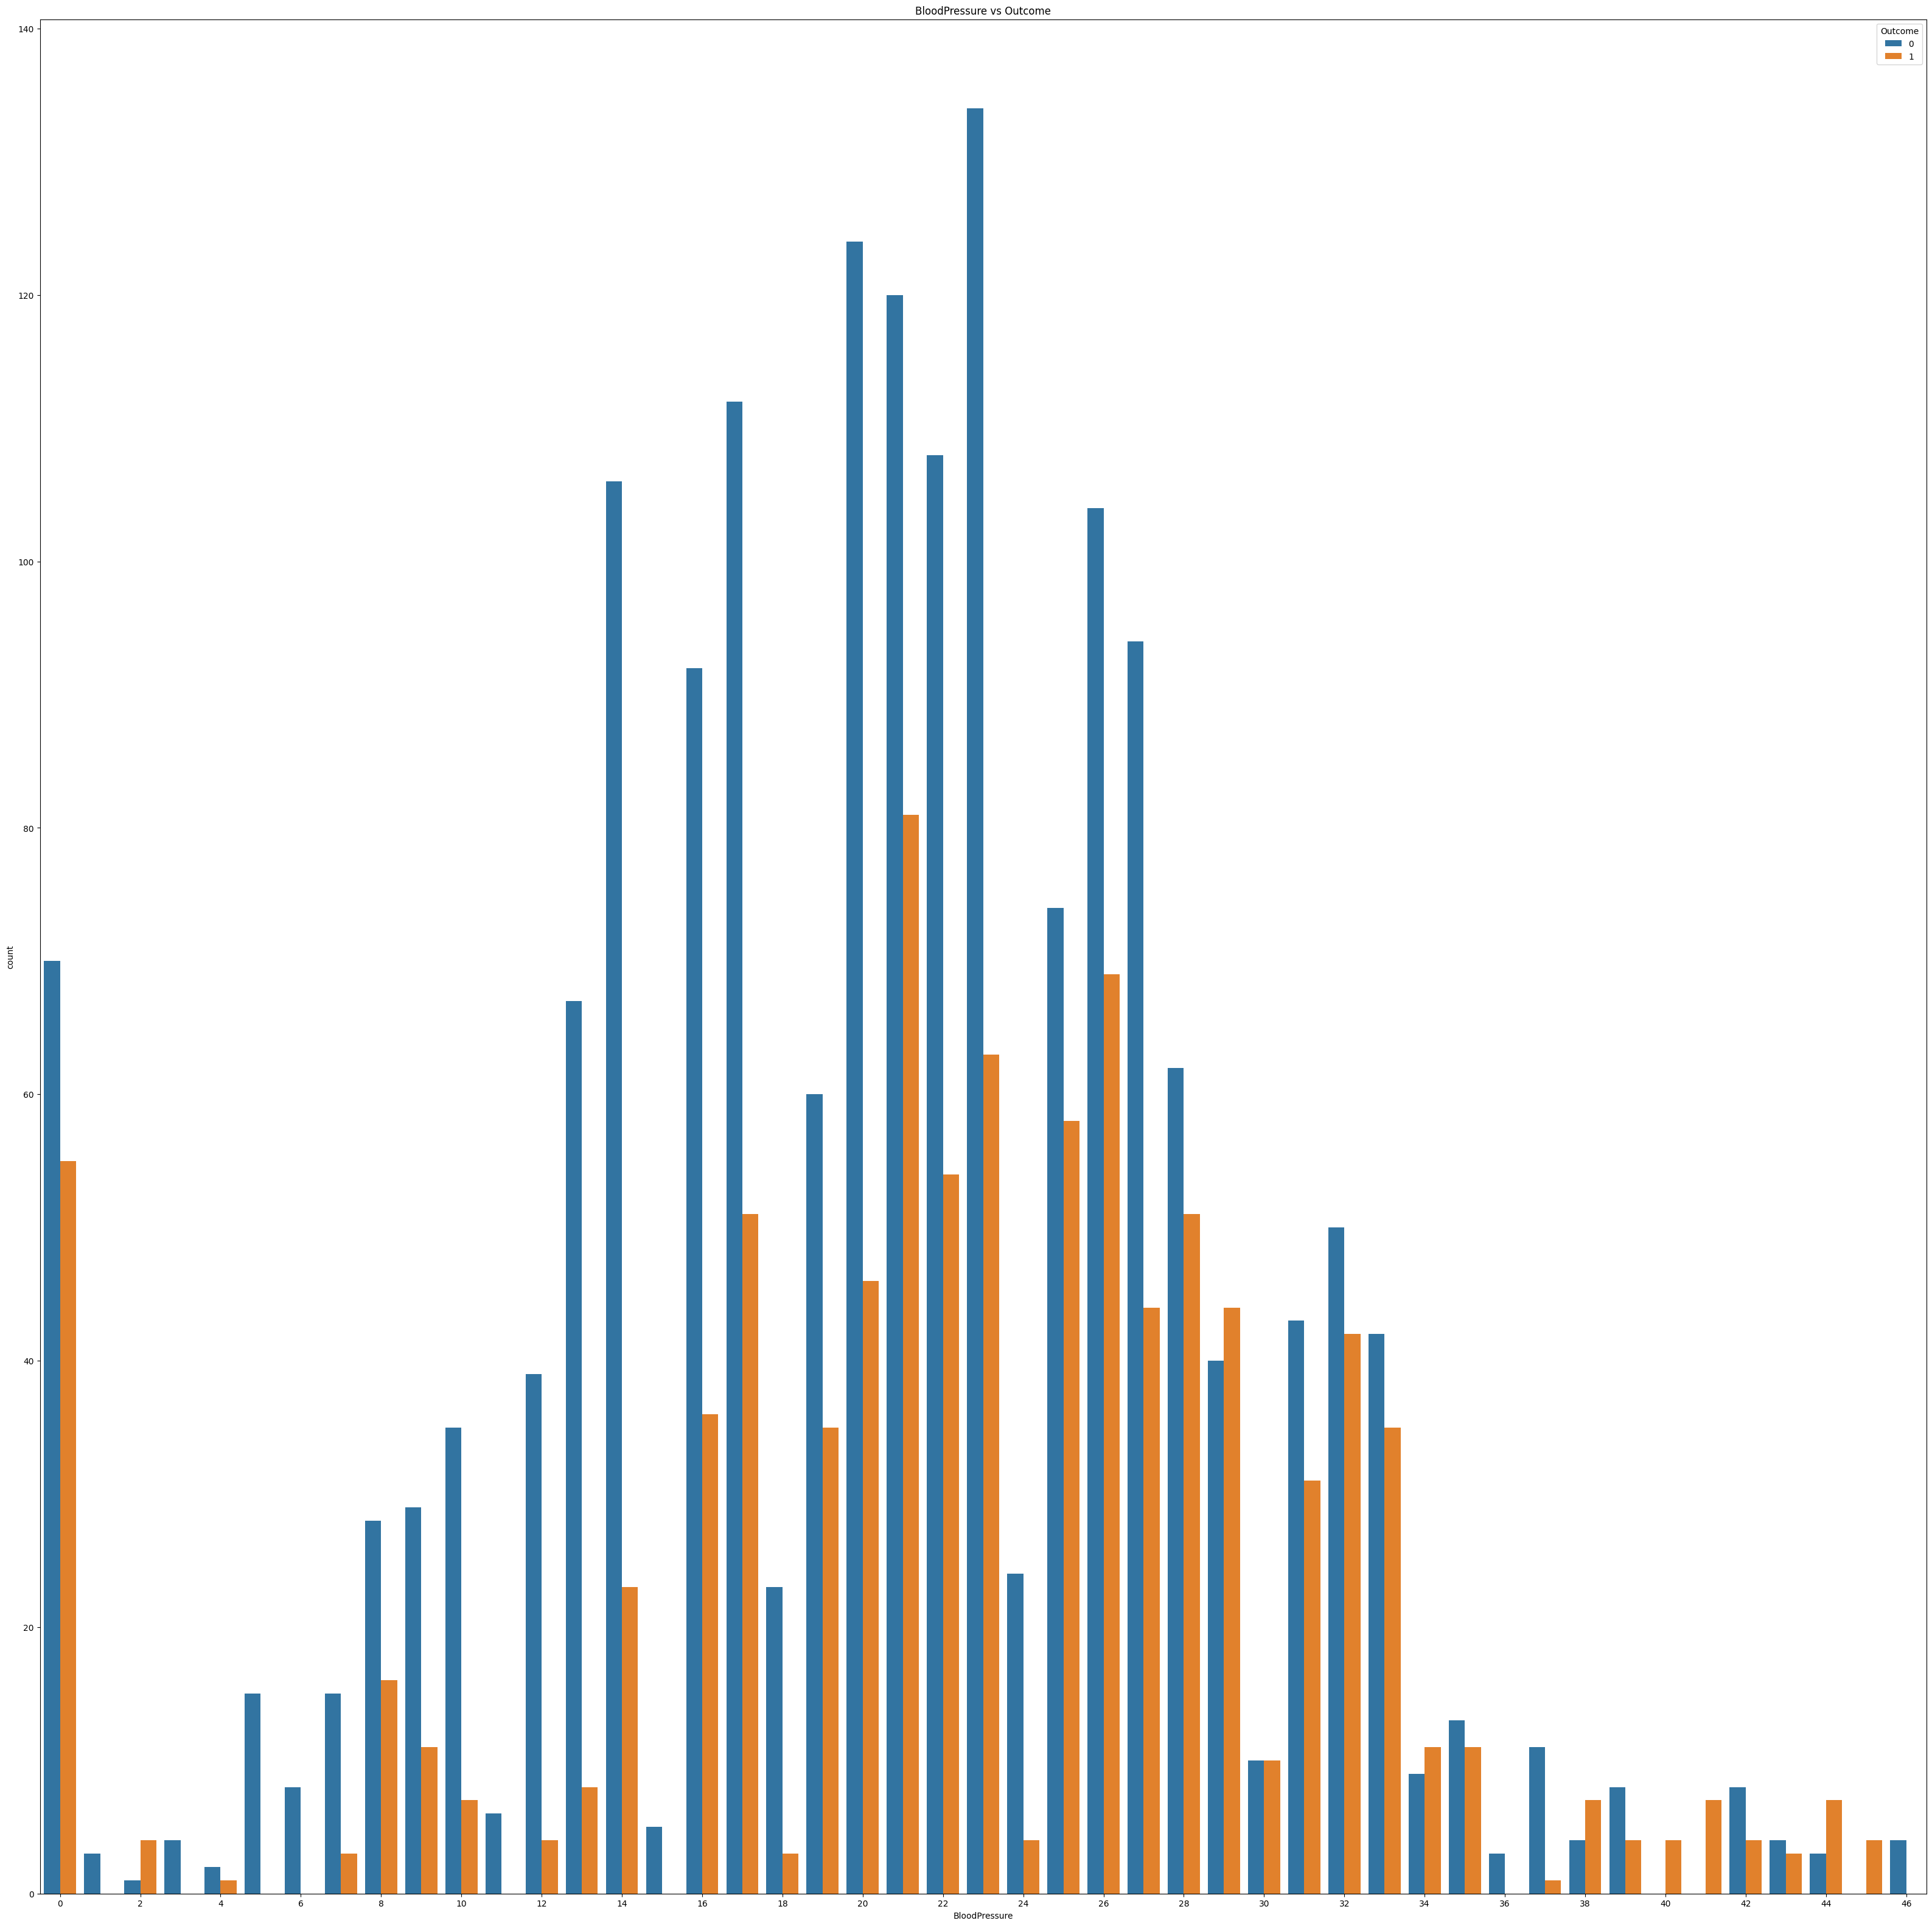

In [ ]:
fig, ax = plt.subplots(figsize=(40, 40))
sns.countplot(x="BloodPressure", hue="Outcome", data=dataset, ax=ax)
ax.set_title("BloodPressure vs Outcome")
num_ticks = 20
xticks = ax.get_xticks()
plt.xticks(xticks[::len(xticks)//num_ticks], xticks[::len(xticks)//num_ticks])
plt.show()

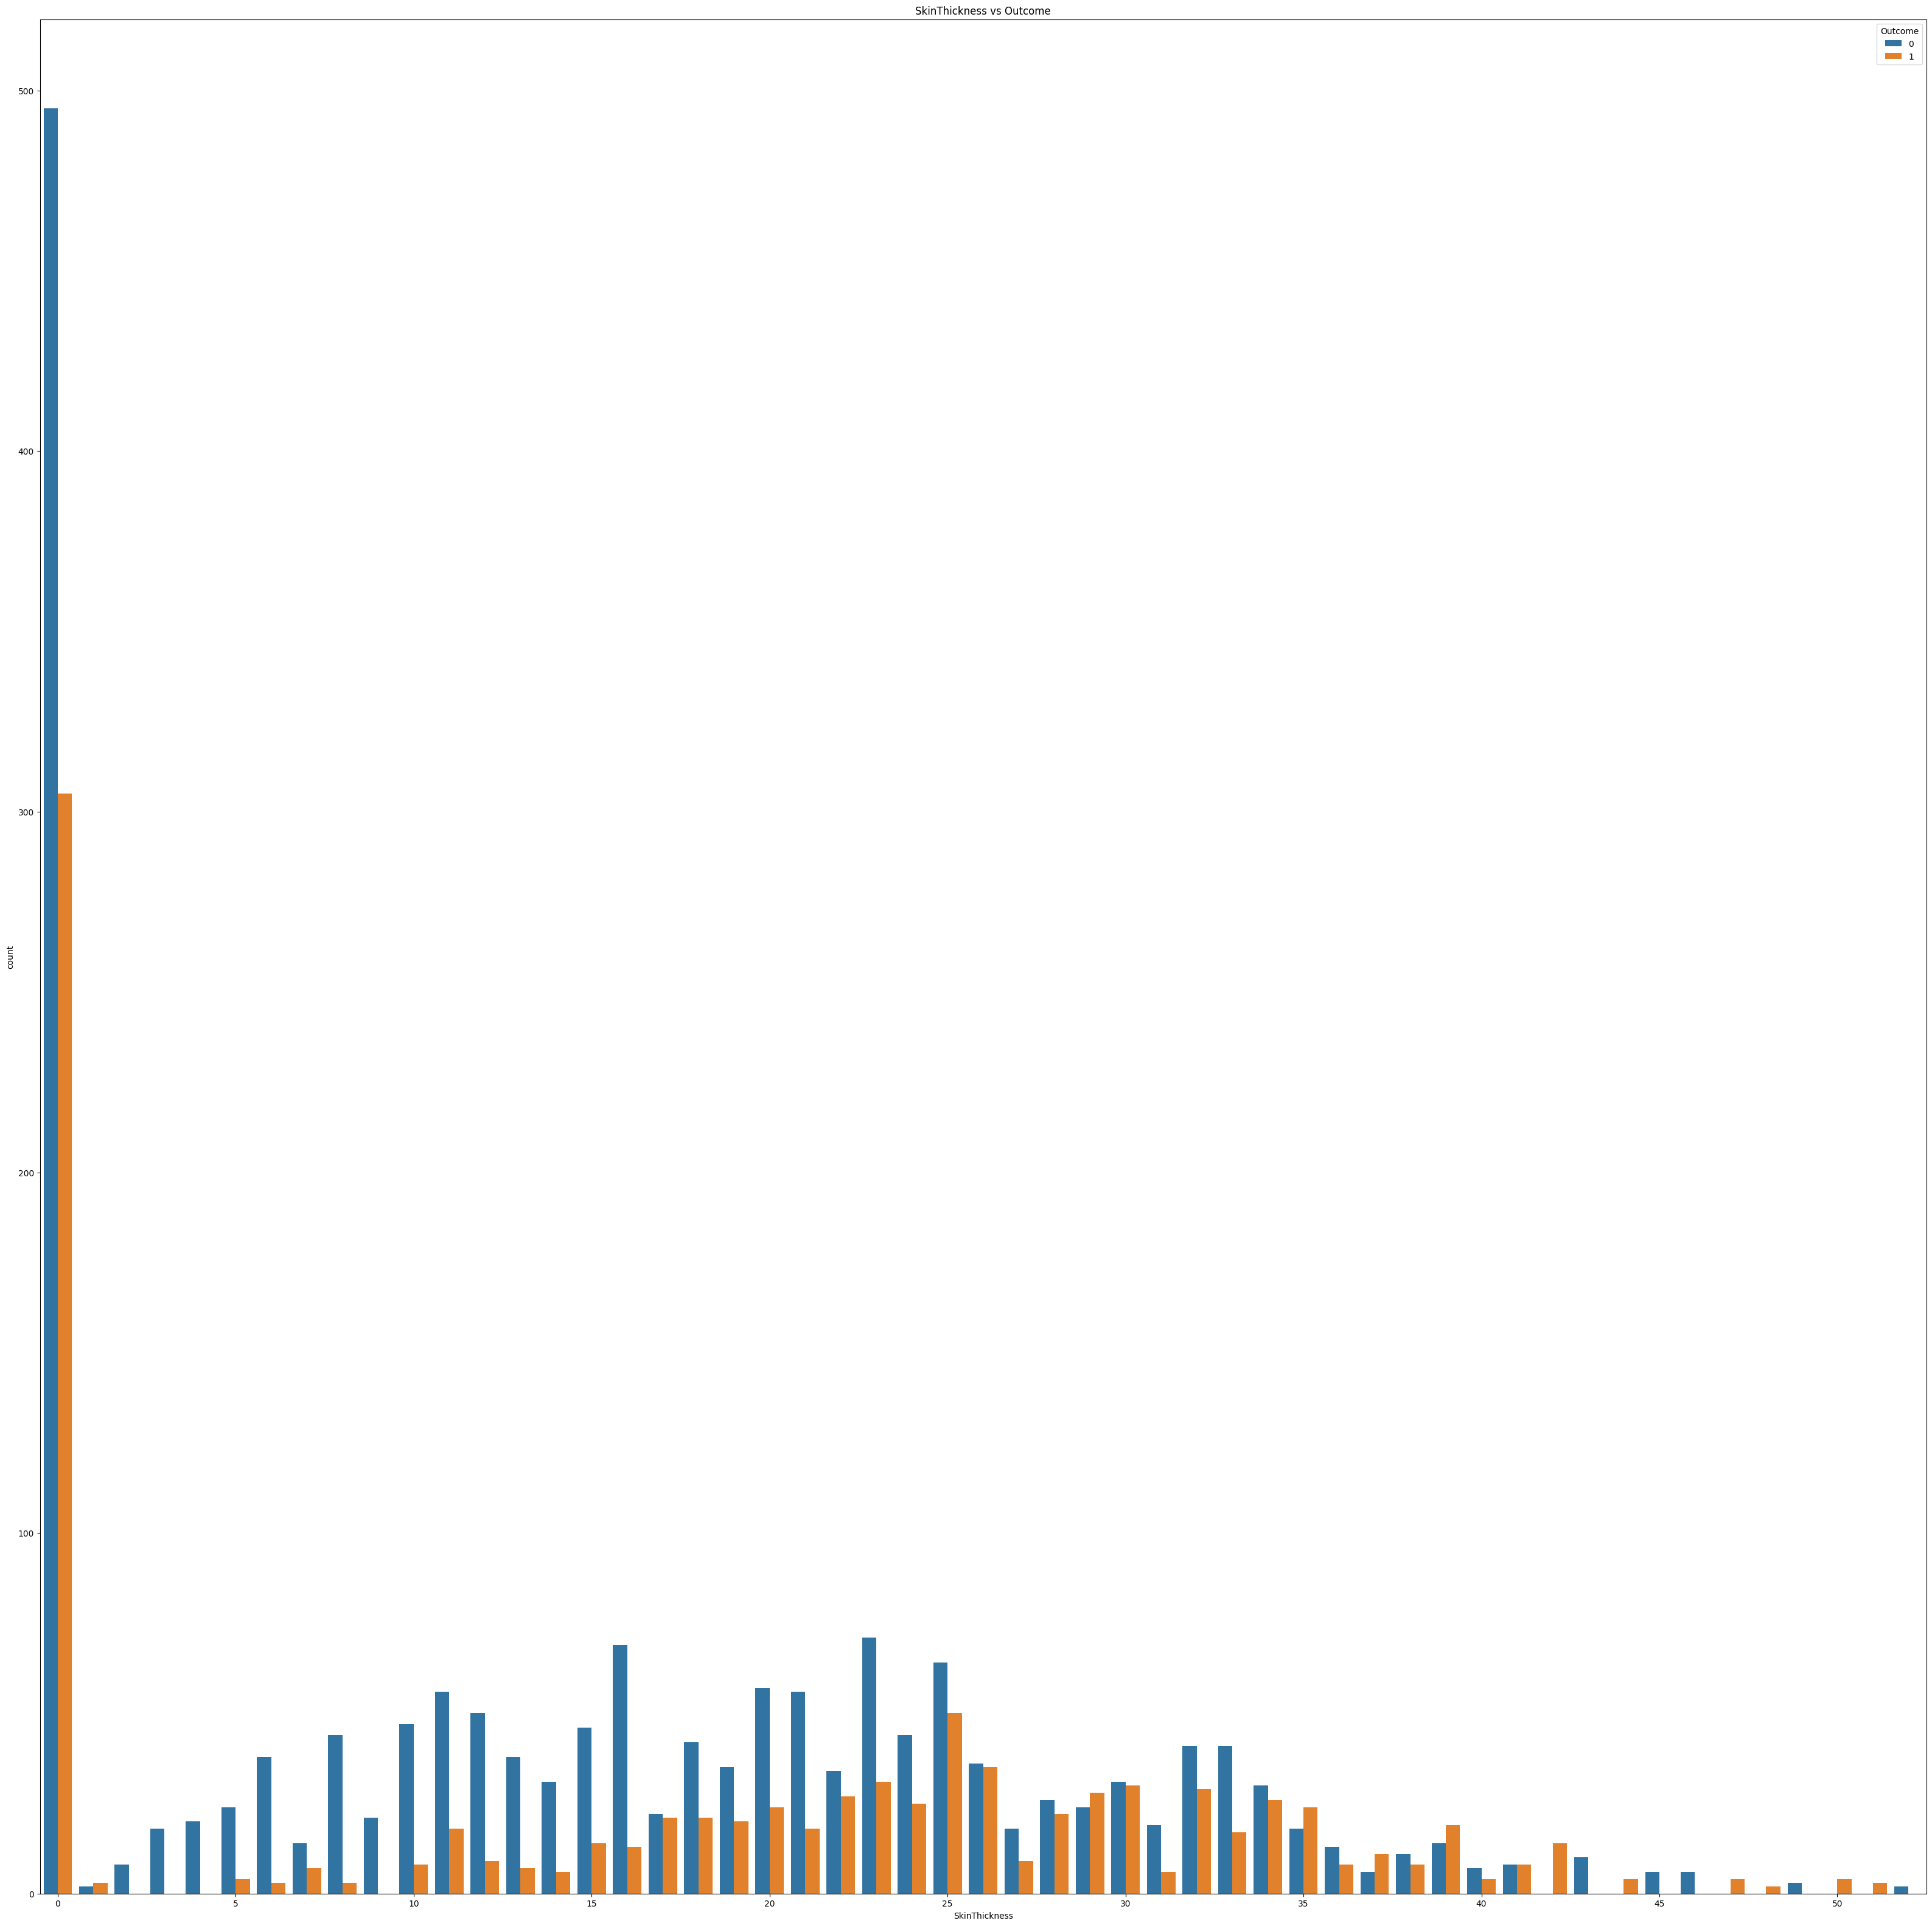

In [ ]:
fig, ax = plt.subplots(figsize=(40, 40))
sns.countplot(x="SkinThickness", hue="Outcome", data=dataset, ax=ax)
ax.set_title("SkinThickness vs Outcome")
num_ticks = 10
xticks = ax.get_xticks()
plt.xticks(xticks[::len(xticks)//num_ticks], xticks[::len(xticks)//num_ticks])
plt.show()


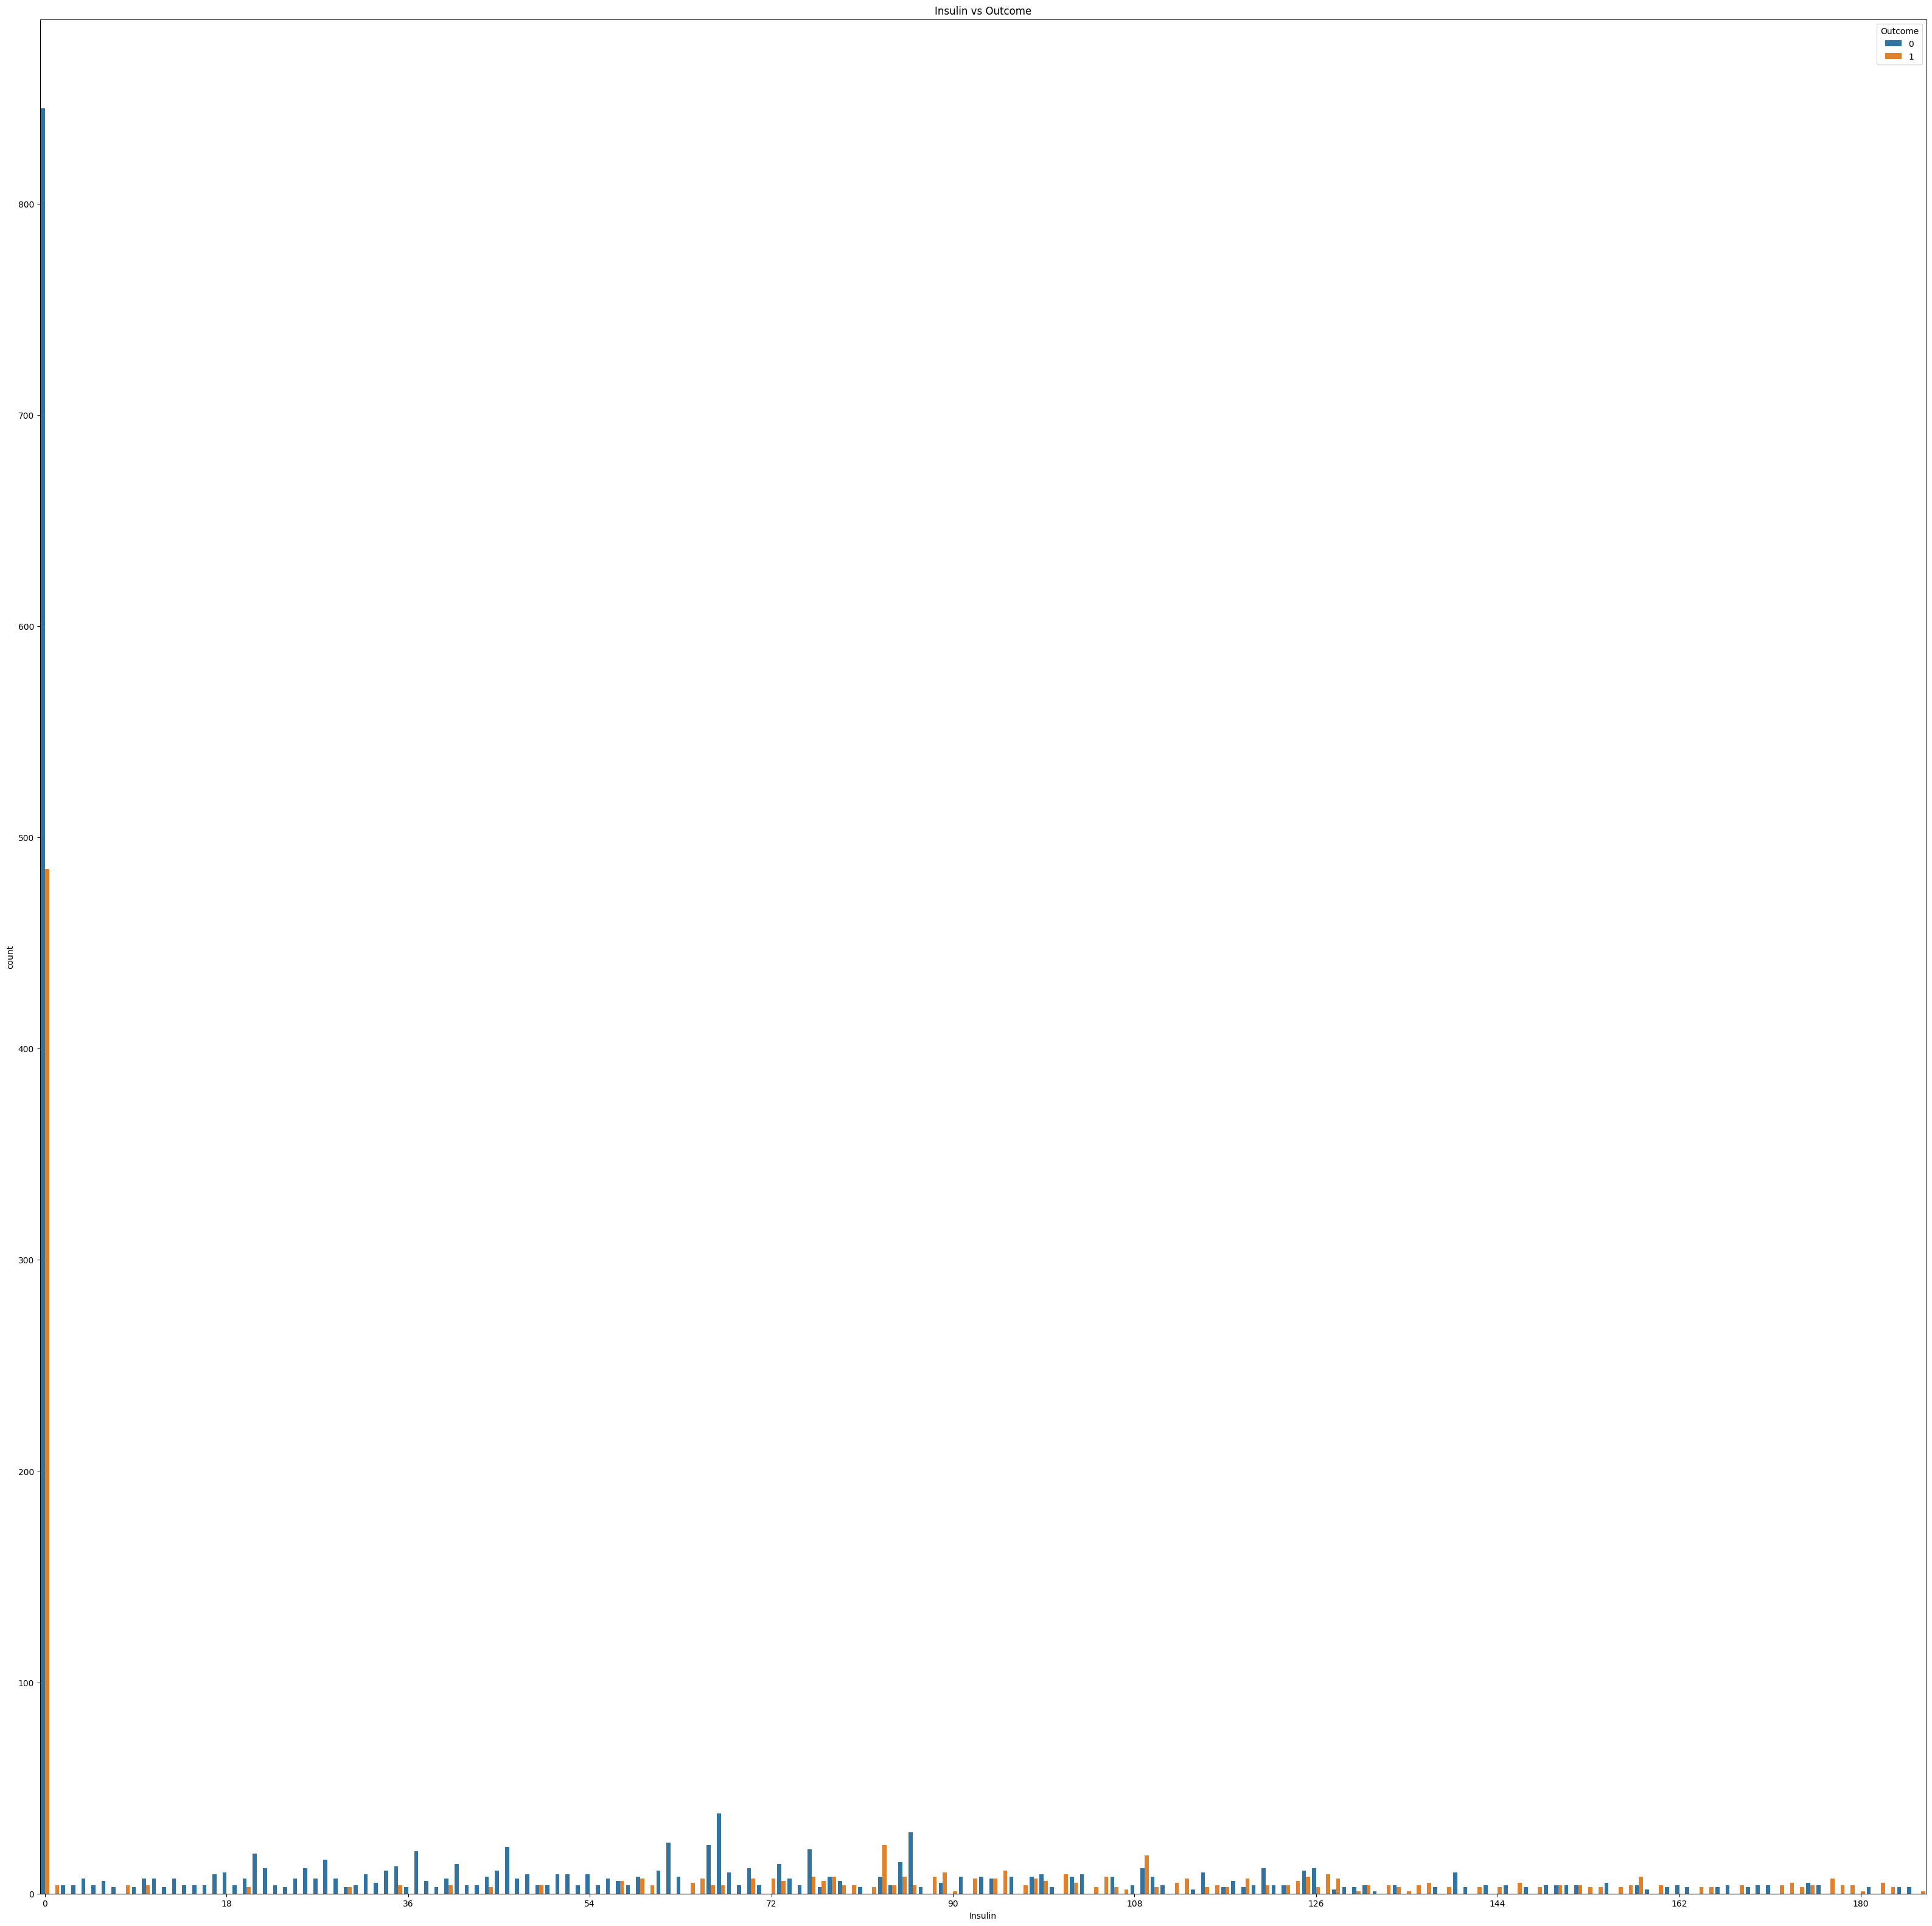

In [ ]:
fig, ax = plt.subplots(figsize=(40, 40))
sns.countplot(x="Insulin", hue="Outcome", data=dataset, ax=ax)
ax.set_title("Insulin vs Outcome")
num_ticks = 10
xticks = ax.get_xticks()
plt.xticks(xticks[::len(xticks)//num_ticks], xticks[::len(xticks)//num_ticks])
plt.show()


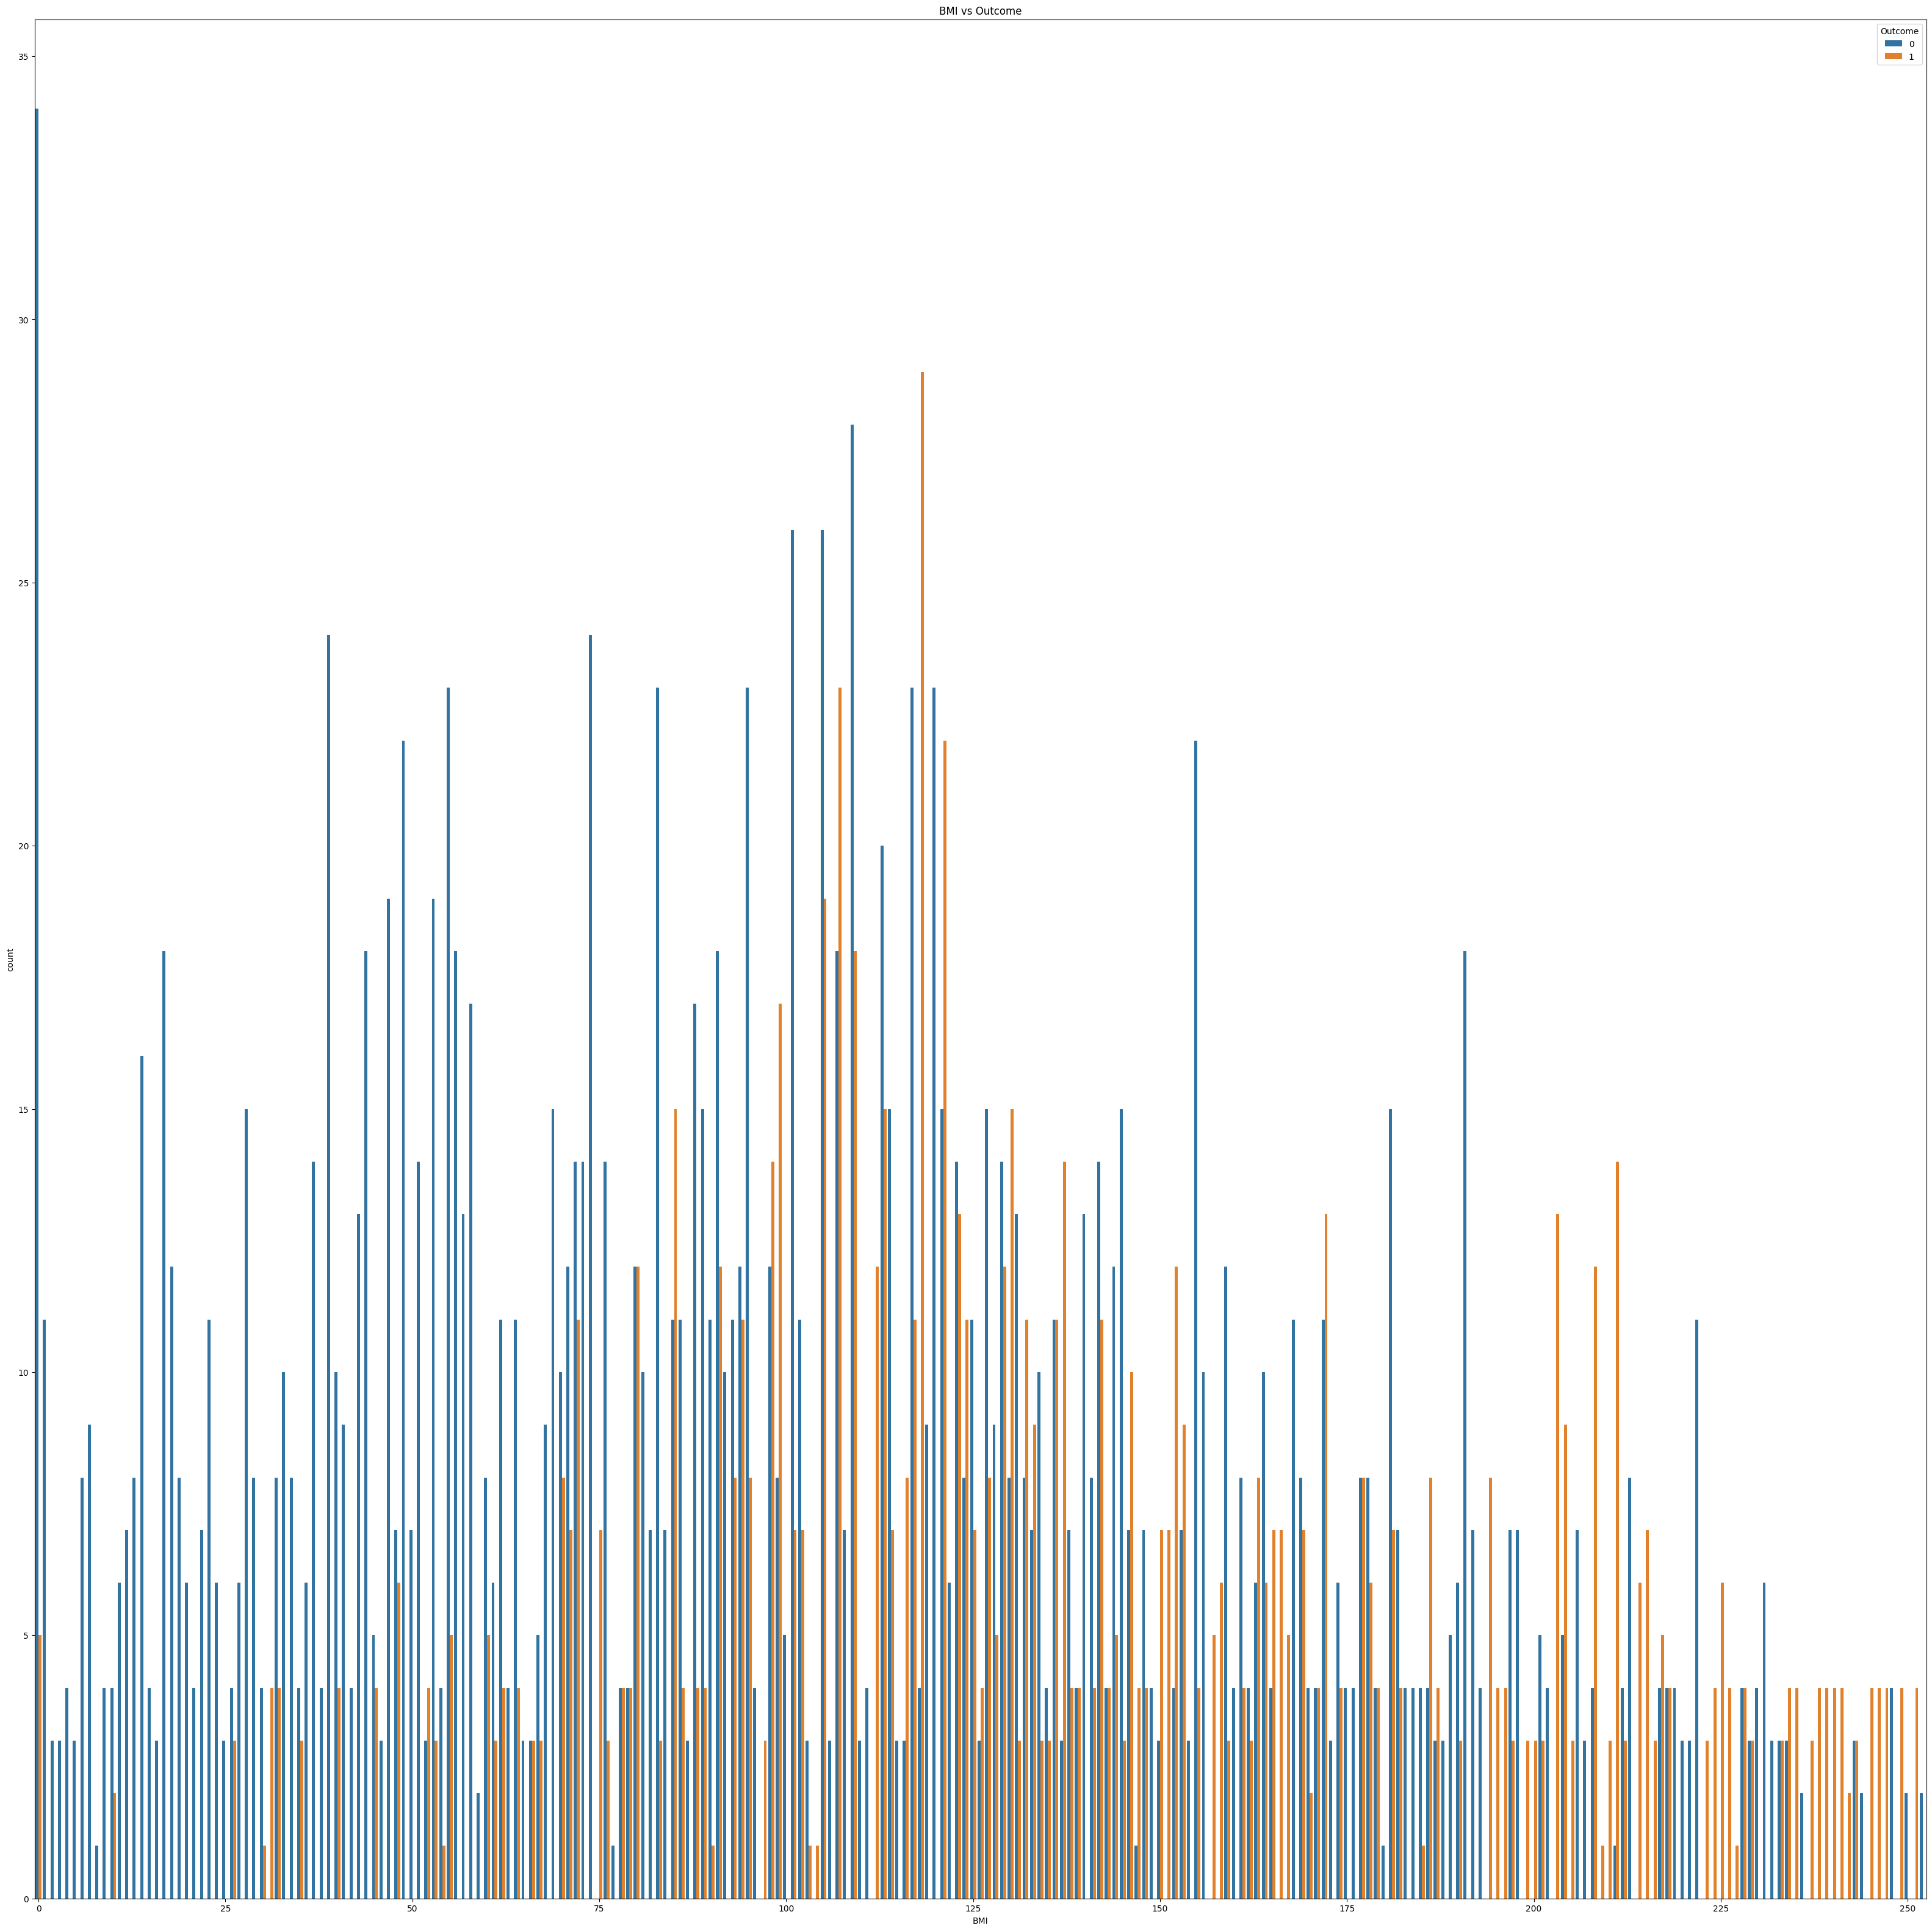

In [ ]:
fig, ax = plt.subplots(figsize=(40, 40))
sns.countplot(x="BMI", hue="Outcome", data=dataset, ax=ax)
ax.set_title("BMI vs Outcome")
num_ticks = 10
xticks = ax.get_xticks()
plt.xticks(xticks[::len(xticks)//num_ticks], xticks[::len(xticks)//num_ticks])
plt.show()

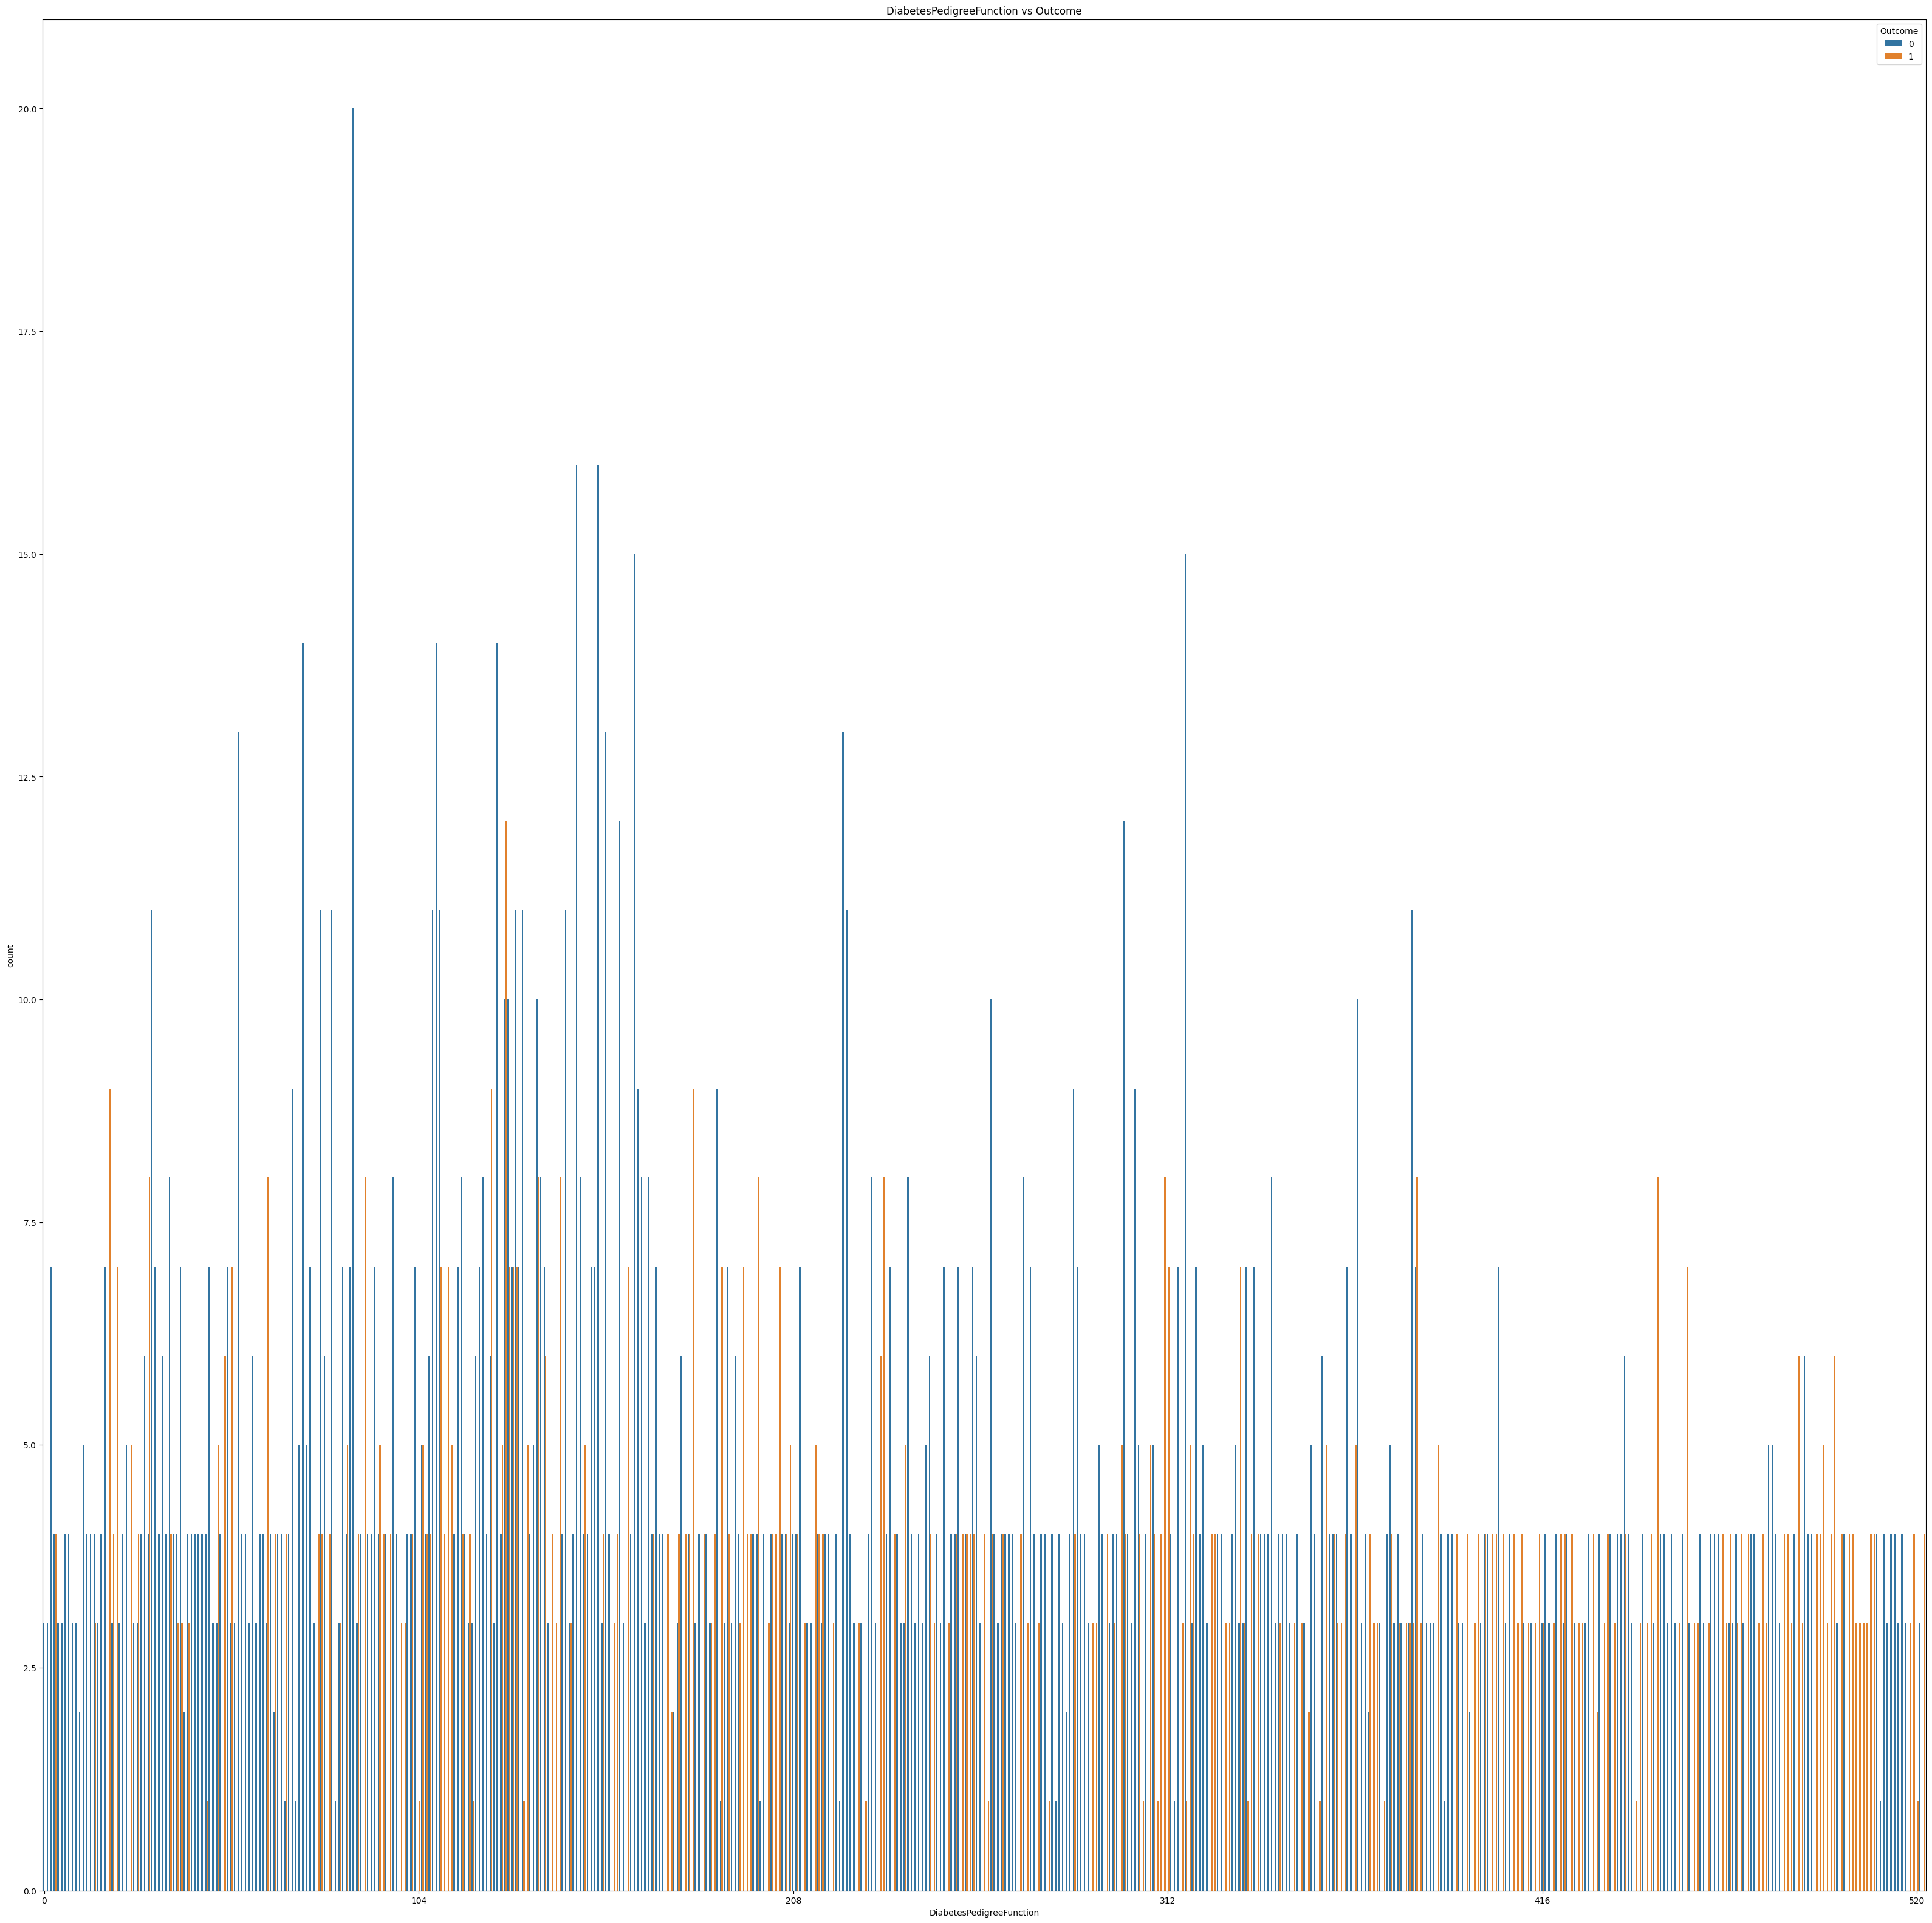

In [ ]:
fig, ax = plt.subplots(figsize=(40, 40))
sns.countplot(x="DiabetesPedigreeFunction", hue="Outcome", data=dataset, ax=ax)
ax.set_title("DiabetesPedigreeFunction vs Outcome")
num_ticks = 5
xticks = ax.get_xticks()
plt.xticks(xticks[::len(xticks)//num_ticks], xticks[::len(xticks)//num_ticks])
plt.show()


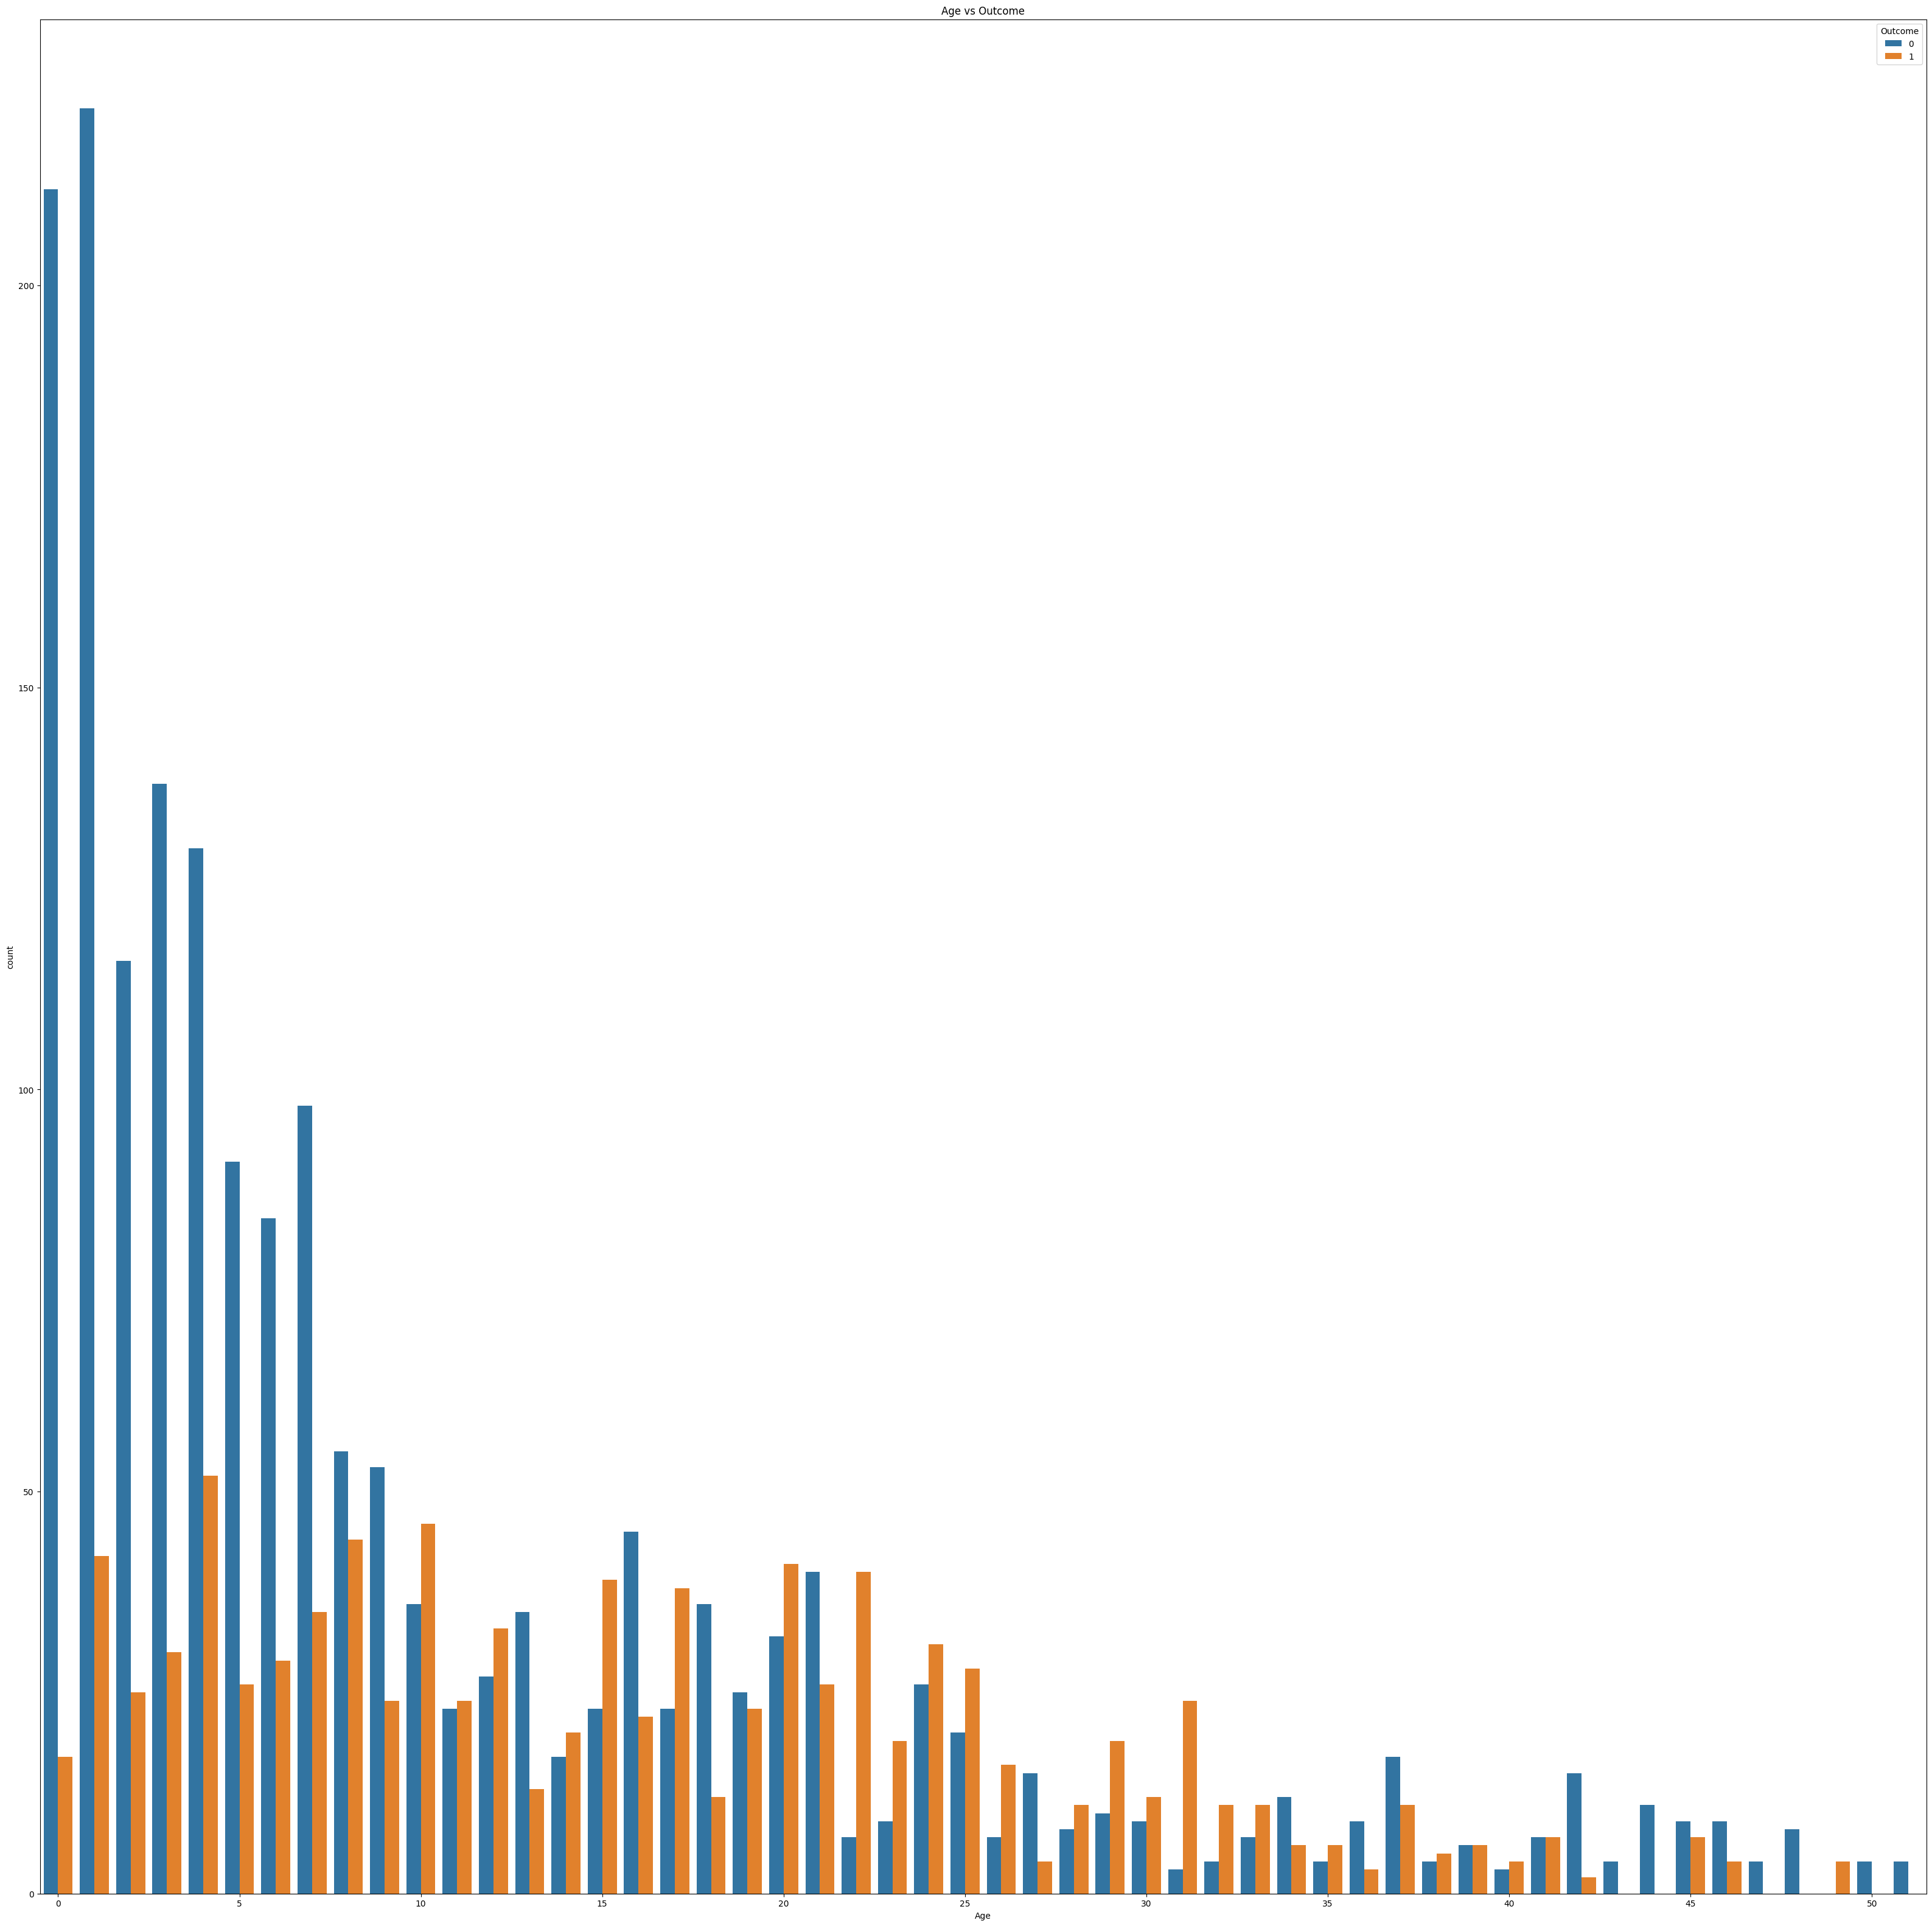

In [ ]:
fig, ax = plt.subplots(figsize=(40, 40))
sns.countplot(x="Age", hue="Outcome", data=dataset, ax=ax)
ax.set_title("Age vs Outcome")
num_ticks = 10
xticks = ax.get_xticks()
plt.xticks(xticks[::len(xticks)//num_ticks], xticks[::len(xticks)//num_ticks])
plt.show()


Choose X

In [ ]:
X = dataset.iloc[:,:-1].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  6.   ,  85.   ,  78.   , ...,  31.2  ,   0.382,  42.   ],
       [  0.   , 129.   , 110.   , ...,  67.1  ,   0.319,  26.   ],
       [  2.   ,  81.   ,  72.   , ...,  30.1  ,   0.547,  25.   ]])

Scale X with mean and stds

In [ ]:
means = X.mean(axis=0)
stds = X.std(axis=0)
X = (X - means)/stds

In [ ]:
y = 2 * dataset.iloc[:,-1].values - 1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
def accuracy(y_true, y_pred):
  total_samples = len(y_true)
  correct_predictions = np.sum(y_true == y_pred)
  return (correct_predictions / total_samples)

# Support Vector Machine

In [ ]:
class SVM:

    def __init__(self, C = 1.0):
        self.C = C
        self.w = 0
        self.b = 0

    # Hinge Loss Function/Calculation


    def hingeloss(self, w, b, x, y):
        # Regularizer term
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Optimization term
            opt_term = y[i] * ((np.dot(w, x[i])) + b)
            # calculating loss
            loss = reg + self.C * max(0, 1 - opt_term)

        return loss[0][0]


    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        # The number of features in X
        number_of_features = X.shape[1]

        # The number of Samples in X
        number_of_samples = X.shape[0]

        c = self.C

        # Creating ids from 0 to number_of_samples - 1
        ids = np.arange(number_of_samples)

        # Shuffling the samples randomly
        np.random.shuffle(ids)

        # creating an array of zeros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Gradient Descent logic
        for i in range(epochs):
            # Calculating the Hinge Loss
            l = self.hingeloss(w, b, X, Y)

            # Appending all losses
            losses.append(l)

            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculating the gradients

                            #w.r.t w
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Updating weights and bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb

        self.w = w
        self.b = b

        return self.w, self.b

    def predict(self, X):

        prediction = np.dot(X, self.w[0]) + self.b # w.x + b
        return np.sign(prediction)

In [ ]:
svm = SVM(C=5.0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(accuracy(y_test, y_pred))


0.7760115606936416


# Compare with sklearn

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',C=5.0)
svc.fit(X, y)

SVC(C=5.0, kernel='linear')

In [ ]:
y_pred_sklearn = svc.predict(X_test)
print(accuracy(y_test, y_pred_sklearn))

0.7745664739884393


# Naive Bayes (Gaussian)

In [ ]:
y = dataset.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
class gaussian_naive_bayes:

  def fit(self, X, y):
    self.m, self.n  = X.shape
    # Get the unique elements in y (class labels)
    self.unique_classes = np.unique(y)
    self.n_unique = len(self.unique_classes)

    # create empty arrays to store mean, variance, priors
    self.mean = np.zeros((self.n_unique, self.n))
    self.variance = np.zeros((self.n_unique, self.n))
    self.priors = np.zeros(self.n_unique)

    for i,c in enumerate(self.unique_classes):
    # Get the portion of the data where y is equal to a certain class
      X_c = X [y==c]
      # Calculate the mean for each class and all features
      self.mean[i,:] = np.mean(X_c, axis = 0)
      # Calculate the variance for each class and all features
      self.variance[i,:] = np.var(X_c, axis = 0)
      # Calculate the priors
      self.priors[i] = X_c.shape[0]/self.m

  def gaussion_density(self,x,c):
    # Get the mean and the variance for the specified class
    mean = self.mean[c]
    variance = self.variance[c]

    # Calculate the Gaussian density function
    const = 1 / np.sqrt(variance * 2 * np.pi)
    probability = np.exp(-0.5 * ((x - mean) ** 2/ variance))

    return const * probability

  def get_probability(self, x):
    # Create an empty list to store posteriors
    posteriors = []

    for i, c in enumerate(self.unique_classes):
      # Calculate the log of the prior
      prior = np.log(self.priors[i])

      # Calculate the new posterior and append it to the list
      posterior = np.sum(np.log(self.gaussion_density(x,i)))
      posterior = posterior + prior
      posteriors.append(posterior)

    # return the class with the highest class probability
    return self.unique_classes[np.argmax(posteriors)]

  def predict(self, X):
    # Create the prediction for this sample
    predictions = []

    #Loop over each sample in X
    for x in X:
      #Get the prediction for this sample
      pred = self.get_probability(x)
      # Append the prediction to the predictions list
      predictions.append(pred)

    return np.array(predictions)


In [ ]:
GaussianNaiveBayes = gaussian_naive_bayes()
GaussianNaiveBayes.fit(X_train, y_train)

In [ ]:
pred = GaussianNaiveBayes.predict(X_test)
print(accuracy(y_test,pred))

0.7673410404624278


# Compare with sklearn

In [ ]:
from sklearn.naive_bayes import GaussianNB


sk_model = GaussianNB()

# Train the model using the training sets
sk_model.fit(X_train,y_train)

#Predict Output
sk_predictions = sk_model.predict(X_test)

#Get the prediction accuracy

accuracy(y_test, sk_predictions)

0.7673410404624278

# K-Nearest Neighbors

In [ ]:
class KNN():
  def __init__(self, n_neighbors=5):
    self.n_neighbors = n_neighbors

  def euclidean_distance(self, x1, x2):
    return np.linalg.norm(x1 - x2)

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train


  def predict(self, X):
    # Create empty array to store the predictions
    predictions = []
    # Loop over X examples
    for x in X:
        # Get prediction using the prediction helper function
        prediction = self._predict(x)
        # Append the prediction to the predictions list
        predictions.append(prediction)
    return np.array(predictions)


  def _predict(self, x):
  # Create empty array to store distances
    distances = []

    # Loop over all training examples and compute the distance between x and all the training examples
    for x_train in self.X_train:
        distance = self.euclidean_distance(x, x_train)
        distances.append(distance)
    distances = np.array(distances)

    # Sort by ascendingly distance and return indices of the given n neighbours
    n_neighbors_idxs = np.argsort(distances)[: self.n_neighbors]

    # Get labels of n-neighbour indexes
    labels = self.y_train[n_neighbors_idxs]
    labels = list(labels)
    # Get the most frequent class in the array
    most_occuring_value = max(labels, key=labels.count)
    return most_occuring_value

In [ ]:
knn = KNN(7)
knn.fit(X_train, y_train)

In [ ]:
predictions = knn.predict(X_test)
acc = accuracy(y_test, predictions)
acc

0.8005780346820809

# Compare with sklearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
skmodel = KNeighborsClassifier(n_neighbors=7)
skmodel.fit(X_train, y_train)

sk_predictions = skmodel.predict(X_test)
sk_accuracy = accuracy(y_test, sk_predictions)
print(sk_accuracy)

0.8005780346820809
